In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#loading the libraries 
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
%matplotlib inline
import random


#for neural network
import keras
from keras.layers import Dense
from keras.models import Sequential

# Getting the data into numpy arrays

In [ ]:
path_training_images = '../input/mnist-dataset/train-images.idx3-ubyte'
path_training_labels = '../input/mnist-dataset/train-labels.idx1-ubyte'

path_test_images = '../input/mnist-dataset/t10k-images.idx3-ubyte'
path_test_labels = '../input/mnist-dataset/t10k-labels.idx1-ubyte'

In [ ]:
#for loading the files
X_train, y_train = loadlocal_mnist(path_training_images,path_training_labels)
X_test, y_test = loadlocal_mnist(path_test_images, path_test_labels)

In [ ]:
print(type(X_train),type(y_train))
# we have the data in numpy arrays

In [ ]:
print('Dim of X train is ',X_train.shape)
print('Dim of y train is ',y_train.shape)
print('Dim of X test is ',X_test.shape)
print('Dim of y test is ',y_test.shape)

(60000,784) means the training data has 60000 images, where each image is an array of len 784, which can be respresented as a square matrix of (28*28)

# Exploring the data

Lets see how a training examples looks like. <br>
We will have a look at the first training examples

In [ ]:
ex_image = X_train[0]
ex_label = y_train[0]

print('Shape of ex is ',ex_image.shape)
print('label of ex is ',ex_label)

This examples contains 784 numbers, which represent the pixel values taken in 28*28 array

In [ ]:
print(ex_image)
# pixel values are from 0 to 255
#0 - black, 255 - white

In [ ]:
#but the above one is not that a good visualization..Lets plot the pixels of this example
plt.imshow(ex_image.reshape(28,28),cmap=plt.cm.gray)
plt.title('This image represents {}'.format(ex_label))
plt.xticks([])
plt.yticks([])

now lets viszualise more of the images

In [ ]:
def show(image, title):
    index = 1 
    plt.figure(figsize=(10,5))

    for x in zip(image, title):        
        image = x[0]        
        title = x[1]
        plt.subplot(2, 5, index)        
        plt.imshow(image.reshape(28,28), cmap=plt.cm.gray)  
        plt.title(x[1], fontsize = 9)
        plt.xticks([])
        plt.yticks([])
        index += 1

In [ ]:
image = []
title = []
for i in range(0, 5):
    r = random.randint(1, len(X_train))
    image.append(X_train[r])
    title.append('training image:' + str(y_train[r]))       

for i in range(0, 5):
    r = random.randint(1, len(X_test))
    image.append(X_test[r])
    title.append('testing image:' + str(y_test[r]))
    
show(image, title)

# Training an ANN

the drawing seems poor, drawn by mouse..

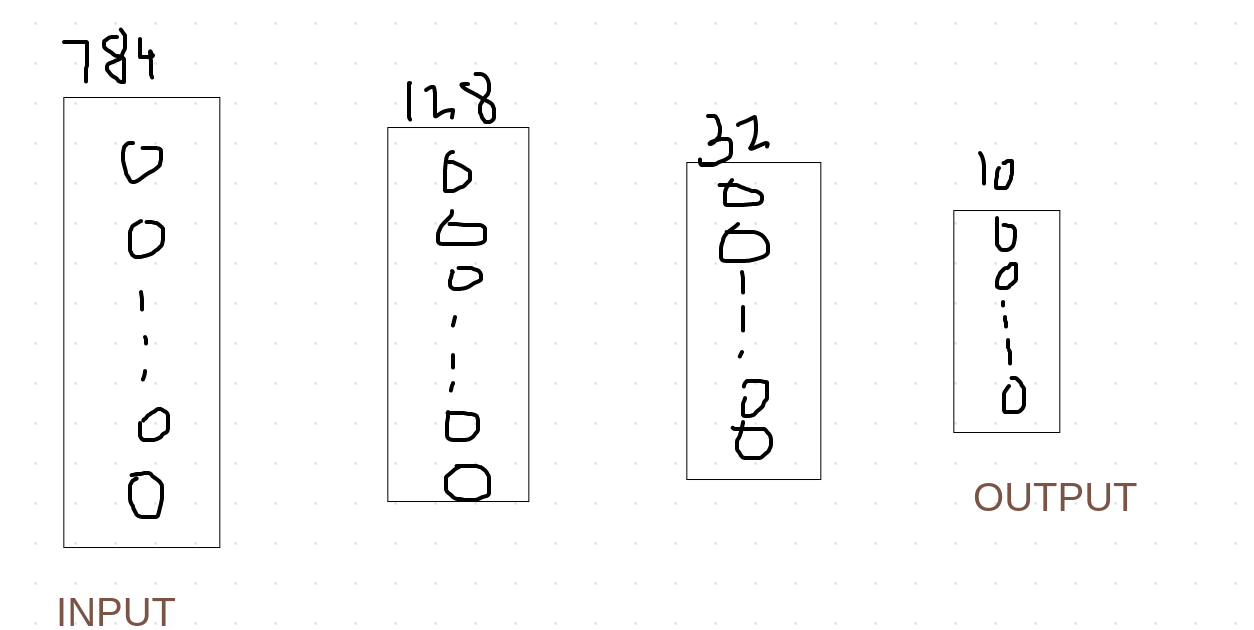

In [ ]:
#before model creation, we need to one hot encode labels
num_classes = 10 # from 0 to 0
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
print(X_train.shape,y_train.shape)
print(y_train[0])

If we remember from above, the first training label was 5, now we have represented the same in one hot.

In [ ]:
model = Sequential()

model.add(Dense(units=128, activation='sigmoid', input_shape=(784,)))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

In [ ]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#fitting the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=.1)


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [ ]:
_,test_acc = model.evaluate(X_test, y_test)
print('Test accuracy is ',test_acc)

# Will results improve if we normalize the data?

now lets repeat the above procedure once again, but this time we will normalize the data


In [ ]:


#normalize the data 
X_train = X_train / 255 
X_test = X_test / 255 


In [ ]:
print(X_train[0])
# now the values are in between 0 to 1

In [ ]:


model = Sequential()

model.add(Dense(units=128, activation='sigmoid', input_shape=(784,)))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

_,test_acc = model.evaluate(X_test, y_test)
print('Test accuracy is ',test_acc)

So, normalization definately imporves the performance of the model.